### MTA Ridership Daily Data Processing

In [58]:
import pandas as pd
import numpy as np

df = pd.read_csv('/workspaces/SU-IST707-Group_Project/Project Data (original)/MTA_Daily_Ridership_Data__2020_-_2025_20250331.csv')
df

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
0,03/01/2020,2212965,0.97,984908,0.99,86790,1.00,55825,0.59,19922,1.13,786960,0.98,1636,0.52
1,03/02/2020,5329915,0.96,2209066,0.99,321569,1.03,180701,0.66,30338,1.02,874619,0.95,17140,1.07
2,03/03/2020,5481103,0.98,2228608,0.99,319727,1.02,190648,0.69,32767,1.10,882175,0.96,17453,1.09
3,03/04/2020,5498809,0.99,2177165,0.97,311662,0.99,192689,0.70,34297,1.15,905558,0.98,17136,1.07
4,03/05/2020,5496453,0.99,2244515,1.00,307597,0.98,194386,0.70,33209,1.12,929298,1.01,17203,1.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,01/05/2025,1791020,0.86,618750,0.67,96683,1.17,79761,0.88,23665,1.75,726411,1.06,2039,0.74
1772,01/06/2025,3436491,0.67,1238969,0.61,229503,0.76,202575,0.75,35840,1.27,792617,0.91,6887,0.42
1773,01/07/2025,3781536,0.74,1275936,0.62,245930,0.81,220945,0.82,38048,1.34,842968,0.97,7409,0.45
1774,01/08/2025,3830616,0.74,1256260,0.61,239444,0.79,209550,0.78,39406,1.39,852748,0.98,7798,0.48


In [59]:
# df summary 
print(df.shape)

(1776, 15)


In [60]:
# column names list

print(df.columns)

Index(['Date', 'Subways: Total Estimated Ridership',
       'Subways: % of Comparable Pre-Pandemic Day',
       'Buses: Total Estimated Ridership',
       'Buses: % of Comparable Pre-Pandemic Day',
       'LIRR: Total Estimated Ridership',
       'LIRR: % of Comparable Pre-Pandemic Day',
       'Metro-North: Total Estimated Ridership',
       'Metro-North: % of Comparable Pre-Pandemic Day',
       'Access-A-Ride: Total Scheduled Trips',
       'Access-A-Ride: % of Comparable Pre-Pandemic Day',
       'Bridges and Tunnels: Total Traffic',
       'Bridges and Tunnels: % of Comparable Pre-Pandemic Day',
       'Staten Island Railway: Total Estimated Ridership',
       'Staten Island Railway: % of Comparable Pre-Pandemic Day'],
      dtype='object')


In [61]:
# confirm data type
df.dtypes


Date                                                        object
Subways: Total Estimated Ridership                           int64
Subways: % of Comparable Pre-Pandemic Day                  float64
Buses: Total Estimated Ridership                             int64
Buses: % of Comparable Pre-Pandemic Day                    float64
LIRR: Total Estimated Ridership                              int64
LIRR: % of Comparable Pre-Pandemic Day                     float64
Metro-North: Total Estimated Ridership                       int64
Metro-North: % of Comparable Pre-Pandemic Day              float64
Access-A-Ride: Total Scheduled Trips                         int64
Access-A-Ride: % of Comparable Pre-Pandemic Day            float64
Bridges and Tunnels: Total Traffic                           int64
Bridges and Tunnels: % of Comparable Pre-Pandemic Day      float64
Staten Island Railway: Total Estimated Ridership             int64
Staten Island Railway: % of Comparable Pre-Pandemic Day    flo

In [62]:
# convert data type 
for col in df.columns:
    if col != 'Date':
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('float64')

df.dtypes

Date                                                        object
Subways: Total Estimated Ridership                         float64
Subways: % of Comparable Pre-Pandemic Day                  float64
Buses: Total Estimated Ridership                           float64
Buses: % of Comparable Pre-Pandemic Day                    float64
LIRR: Total Estimated Ridership                            float64
LIRR: % of Comparable Pre-Pandemic Day                     float64
Metro-North: Total Estimated Ridership                     float64
Metro-North: % of Comparable Pre-Pandemic Day              float64
Access-A-Ride: Total Scheduled Trips                       float64
Access-A-Ride: % of Comparable Pre-Pandemic Day            float64
Bridges and Tunnels: Total Traffic                         float64
Bridges and Tunnels: % of Comparable Pre-Pandemic Day      float64
Staten Island Railway: Total Estimated Ridership           float64
Staten Island Railway: % of Comparable Pre-Pandemic Day    flo

In [63]:
# remove unneccessary columns 

columns_to_keep = [
    'Date',
    'Subways: Total Estimated Ridership',
    'Buses: Total Estimated Ridership',
    'LIRR: Total Estimated Ridership',
    'Metro-North: Total Estimated Ridership',
    'Access-A-Ride: Total Scheduled Trips',
    'Bridges and Tunnels: Total Traffic',
    'Staten Island Railway: Total Estimated Ridership'
]

df_filtered = df[columns_to_keep]
df_filtered

,Date,Subways: Total Estimated Ridership,Buses: Total Estimated Ridership,LIRR: Total Estimated Ridership,Metro-North: Total Estimated Ridership,Access-A-Ride: Total Scheduled Trips,Bridges and Tunnels: Total Traffic,Staten Island Railway: Total Estimated Ridership
0,03/01/2020,2212965.0,984908.0,86790.0,55825.0,19922.0,786960.0,1636.0
1,03/02/2020,5329915.0,2209066.0,321569.0,180701.0,30338.0,874619.0,17140.0
2,03/03/2020,5481103.0,2228608.0,319727.0,190648.0,32767.0,882175.0,17453.0
3,03/04/2020,5498809.0,2177165.0,311662.0,192689.0,34297.0,905558.0,17136.0
4,03/05/2020,5496453.0,2244515.0,307597.0,194386.0,33209.0,929298.0,17203.0
...,...,...,...,...,...,...,...,...
1771,01/05/2025,1791020.0,618750.0,96683.0,79761.0,23665.0,726411.0,2039.0
1772,01/06/2025,3436491.0,1238969.0,229503.0,202575.0,35840.0,792617.0,6887.0
1773,01/07/2025,3781536.0,1275936.0,245930.0,220945.0,38048.0,842968.0,7409.0
1774,01/08/2025,3830616.0,1256260.0,239444.0,209550.0,39406.0,852748.0,7798.0


In [64]:

df_filtered['Date'] = pd.to_datetime(df['Date'])

# Count total unique days
unique_days = df['Date'].nunique()
print(f"Unique days: {unique_days}")

# Check for duplicate days
duplicates = df['Date'].duplicated().sum()
print(f"Duplicate days: {duplicates}")

full_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max())

# Find missing days
missing_days = full_range.difference(df['Date'].unique())
print(f"Missing days: {len(missing_days)}")
print(missing_days)


Unique days: 1776
Duplicate days: 0
Missing days: 1461
DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2024-12-22', '2024-12-23', '2024-12-24', '2024-12-25',
               '2024-12-26', '2024-12-27', '2024-12-28', '2024-12-29',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', length=1461, freq='D')


/tmp/ipykernel_37281/9295429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df['Date'])


In [65]:
# count na's

df_filtered.isna().sum()


Date                                                0
Subways: Total Estimated Ridership                  0
Buses: Total Estimated Ridership                    0
LIRR: Total Estimated Ridership                     0
Metro-North: Total Estimated Ridership              0
Access-A-Ride: Total Scheduled Trips                0
Bridges and Tunnels: Total Traffic                  0
Staten Island Railway: Total Estimated Ridership    0
dtype: int64

In [66]:
# export cleaned data 

df_filtered.to_csv("MTA_daily_ridership_cleaned.csv", index=False)


/tmp/ipykernel_37281/1976094794.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_filtered.resample('M').mean()


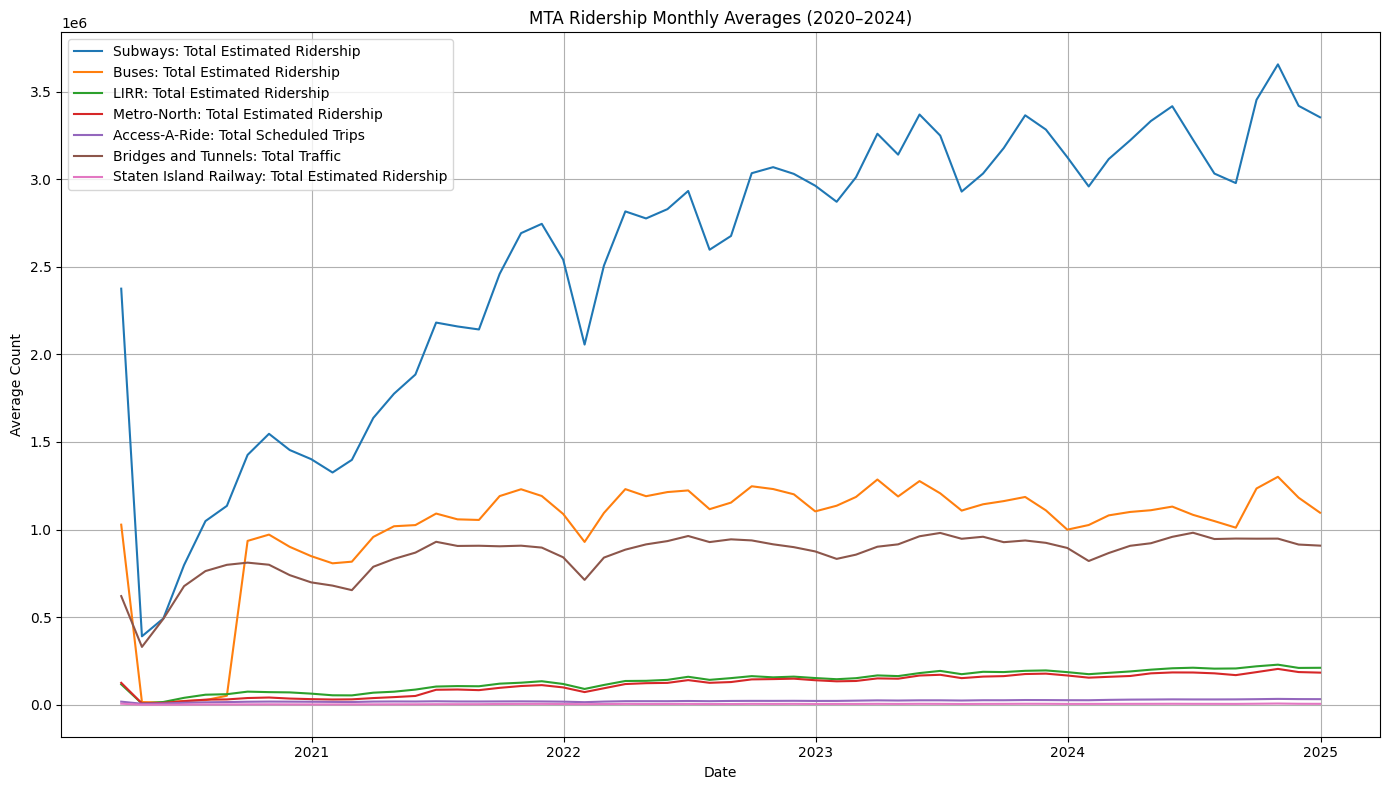

In [67]:
# plot monthly averages for 2020-2024 
import matplotlib.pyplot as plt

df_filtered = df_filtered[(df_filtered['Date'] >= '2020-01-01') & (df_filtered['Date'] <= '2024-12-31')]

df_filtered.set_index('Date', inplace=True)

monthly_avg = df_filtered.resample('M').mean()

columns_to_plot = [
    'Subways: Total Estimated Ridership',
    'Buses: Total Estimated Ridership',
    'LIRR: Total Estimated Ridership',
    'Metro-North: Total Estimated Ridership',
    'Access-A-Ride: Total Scheduled Trips',
    'Bridges and Tunnels: Total Traffic',
    'Staten Island Railway: Total Estimated Ridership'
]

plt.figure(figsize=(14, 8))
for col in columns_to_plot:
    if col in monthly_avg.columns:
        plt.plot(monthly_avg.index, monthly_avg[col], label=col)

plt.title('MTA Ridership Monthly Averages (2020–2024)')
plt.xlabel('Date')
plt.ylabel('Average Count')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


['Date', 'Subways: Total Estimated Ridership', 'Buses: Total Estimated Ridership', 'LIRR: Total Estimated Ridership', 'Metro-North: Total Estimated Ridership', 'Access-A-Ride: Total Scheduled Trips', 'Bridges and Tunnels: Total Traffic', 'Staten Island Railway: Total Estimated Ridership']


/tmp/ipykernel_37281/1098449501.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'], errors='coerce')


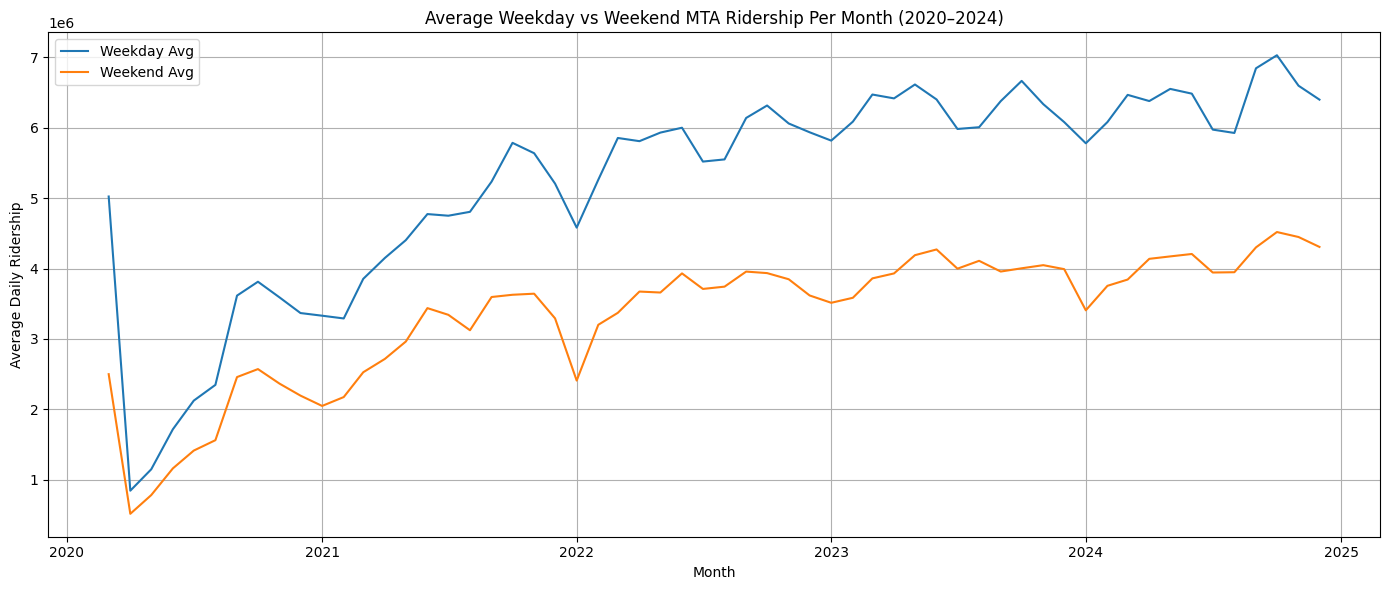

In [68]:
# Plot Weekday vs Weekend Trends
df_filtered.reset_index(inplace=True)
print(df_filtered.columns.tolist())

import pandas as pd
import matplotlib.pyplot as plt

df_filtered.columns = df_filtered.columns.str.strip()

if df_filtered.index.name == 'Date':
    df_filtered.reset_index(inplace=True)

df_filtered['Date'] = pd.to_datetime(df_filtered['Date'], errors='coerce')
df_filtered = df_filtered.dropna(subset=['Date'])

df_filtered = df_filtered[(df_filtered['Date'] >= '2020-01-01') & (df_filtered['Date'] <= '2024-12-31')]

df_filtered['is_weekend'] = df_filtered['Date'].dt.weekday >= 5

columns_to_sum = [
    'Subways: Total Estimated Ridership',
    'Buses: Total Estimated Ridership',
    'LIRR: Total Estimated Ridership',
    'Metro-North: Total Estimated Ridership',
    'Access-A-Ride: Total Scheduled Trips',
    'Bridges and Tunnels: Total Traffic',
    'Staten Island Railway: Total Estimated Ridership'
]

df_filtered[columns_to_sum] = df_filtered[columns_to_sum].apply(pd.to_numeric, errors='coerce')

df_filtered['Total_Ridership'] = df_filtered[columns_to_sum].sum(axis=1)

df_filtered['Month'] = df_filtered['Date'].dt.to_period('M')

monthly_avg = df_filtered.groupby(['Month', 'is_weekend'])['Total_Ridership'].mean().unstack()
monthly_avg.columns = ['Weekday Avg', 'Weekend Avg']

plt.figure(figsize=(14, 6))
plt.plot(monthly_avg.index.to_timestamp(), monthly_avg['Weekday Avg'], label='Weekday Avg')
plt.plot(monthly_avg.index.to_timestamp(), monthly_avg['Weekend Avg'], label='Weekend Avg')

plt.title('Average Weekday vs Weekend MTA Ridership Per Month (2020–2024)')
plt.xlabel('Month')
plt.ylabel('Average Daily Ridership')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



